In [28]:
import numpy as np
import pandas as pd
import missingno as msno
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score


from csv import writer


In [29]:
import pandas as pd
df=pd.read_csv('loan_data_9578.csv')
df.rename(columns=lambda x: x.strip(), inplace=True)
df.columns = df.columns.str.strip()
#df['education'] = df['education'].str.strip()
#df['self_employed'] = df['self_employed'].str.strip()
#df['loan_status'] = df['loan_status'].str.strip()
#df.drop(columns=['loan_id'], inplace=True)
df

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9573,0,all_other,0.1461,344.76,12.180755,10.39,672,10474.000000,215372,82.1,2,0,0,1
9574,0,all_other,0.1253,257.70,11.141862,0.21,722,4380.000000,184,1.1,5,0,0,1
9575,0,debt_consolidation,0.1071,97.81,10.596635,13.09,687,3450.041667,10036,82.9,8,0,0,1
9576,0,home_improvement,0.1600,351.58,10.819778,19.18,692,1800.000000,0,3.2,5,0,0,1


In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   credit.policy      9578 non-null   int64  
 1   purpose            9578 non-null   object 
 2   int.rate           9578 non-null   float64
 3   installment        9578 non-null   float64
 4   log.annual.inc     9578 non-null   float64
 5   dti                9578 non-null   float64
 6   fico               9578 non-null   int64  
 7   days.with.cr.line  9578 non-null   float64
 8   revol.bal          9578 non-null   int64  
 9   revol.util         9578 non-null   float64
 10  inq.last.6mths     9578 non-null   int64  
 11  delinq.2yrs        9578 non-null   int64  
 12  pub.rec            9578 non-null   int64  
 13  not.fully.paid     9578 non-null   int64  
dtypes: float64(6), int64(7), object(1)
memory usage: 1.0+ MB


In [31]:
df['not.fully.paid'].value_counts()

not.fully.paid
0    8045
1    1533
Name: count, dtype: int64

In [32]:
# List of features to analyze
features_to_analyze = ['inq.last.6mths', 'delinq.2yrs', 'pub.rec']

# Loop through each feature
for feature in features_to_analyze:
    # Get unique values and their counts
    unique_values_counts = df[feature].value_counts()

    # Calculate the percentage per unique value
    percentages = (unique_values_counts / unique_values_counts.sum()) * 100

    # Sort the unique values in ascending order
    unique_values_counts = unique_values_counts.sort_index()
    percentages = percentages.sort_index()

    # Print the results
    print(f"Feature: {feature}")
    print("Unique Values\tCounts\tPercentage")
    for value, count, percentage in zip(unique_values_counts.index, unique_values_counts, percentages):
        print(f"{value}\t\t{count}\t\t{percentage:.2f}%")
    print("\n")

Feature: inq.last.6mths
Unique Values	Counts	Percentage
0		3637		37.97%
1		2462		25.70%
2		1384		14.45%
3		864		9.02%
4		475		4.96%
5		278		2.90%
6		165		1.72%
7		100		1.04%
8		72		0.75%
9		47		0.49%
10		23		0.24%
11		15		0.16%
12		15		0.16%
13		6		0.06%
14		6		0.06%
15		9		0.09%
16		3		0.03%
17		2		0.02%
18		4		0.04%
19		2		0.02%
20		1		0.01%
24		2		0.02%
25		1		0.01%
27		1		0.01%
28		1		0.01%
31		1		0.01%
32		1		0.01%
33		1		0.01%


Feature: delinq.2yrs
Unique Values	Counts	Percentage
0		8458		88.31%
1		832		8.69%
2		192		2.00%
3		65		0.68%
4		19		0.20%
5		6		0.06%
6		2		0.02%
7		1		0.01%
8		1		0.01%
11		1		0.01%
13		1		0.01%


Feature: pub.rec
Unique Values	Counts	Percentage
0		9019		94.16%
1		533		5.56%
2		19		0.20%
3		5		0.05%
4		1		0.01%
5		1		0.01%




In [33]:
from sklearn.preprocessing import LabelEncoder

# Create a LabelEncoder instance
label_encoder = LabelEncoder()

# Apply label encoding to the 'education' column
df['purpose'] = label_encoder.fit_transform(df['purpose'])

# Apply label encoding to the 'self_employed' column
#df['self_employed'] = label_encoder.fit_transform(df['self_employed'])
#df['self_employed'] = df['self_employed'].replace(['Yes', 'No'], [1,0])

# Apply label encoding to the 'loan_status' column
#df['loan_status'] = label_encoder.fit_transform(df['loan_status'])
#df['loan_status'] = df['loan_status'].replace(['Approved', 'Rejected'], [1,0])

# Display the updated DataFrame with encoded columns
print(df[['purpose']])

      purpose
0           2
1           1
2           2
3           2
4           1
...       ...
9573        0
9574        0
9575        2
9576        4
9577        2

[9578 rows x 1 columns]


In [34]:
df

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,2,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,1,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,2,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,2,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,1,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9573,0,0,0.1461,344.76,12.180755,10.39,672,10474.000000,215372,82.1,2,0,0,1
9574,0,0,0.1253,257.70,11.141862,0.21,722,4380.000000,184,1.1,5,0,0,1
9575,0,2,0.1071,97.81,10.596635,13.09,687,3450.041667,10036,82.9,8,0,0,1
9576,0,4,0.1600,351.58,10.819778,19.18,692,1800.000000,0,3.2,5,0,0,1


In [35]:
#df['cibil_grp'] = np.where((df['cibil_score']>=300) & (df['cibil_score']<=500),"1",
#                           np.where((df['cibil_score']>500)& (df['cibil_score']<600),"2","3"))

In [36]:
# Define the feature columns (X) and target column (y)
y = df['not.fully.paid']  # Target variable
x = df.drop(columns=['not.fully.paid'])  # Drop 'loan_status' column to get feature columns
x[x < 0]=0
x

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec
0,1,2,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0
1,1,1,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0
2,1,2,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0
3,1,2,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0
4,1,1,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9573,0,0,0.1461,344.76,12.180755,10.39,672,10474.000000,215372,82.1,2,0,0
9574,0,0,0.1253,257.70,11.141862,0.21,722,4380.000000,184,1.1,5,0,0
9575,0,2,0.1071,97.81,10.596635,13.09,687,3450.041667,10036,82.9,8,0,0
9576,0,4,0.1600,351.58,10.819778,19.18,692,1800.000000,0,3.2,5,0,0


In [37]:
#x = x.drop(columns=['log.annual.inc'])

In [38]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
#x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.15, random_state=0)

priors: None
var_smoothing: 0.2154434690031884
[[1579   32]
 [ 292   13]]


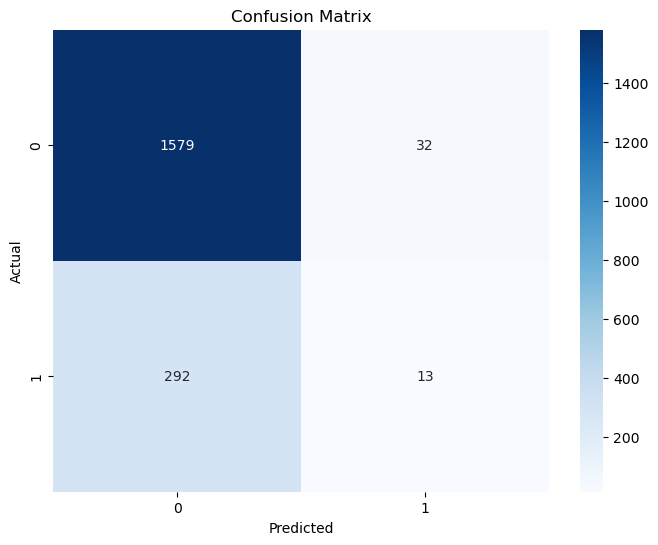

GaussianNB Classifier Metrics:
AUC: 0.5113797559809099
Accuracy: 0.8308977035490606
Precision: 0.7555784668779517
Recall: 0.8308977035490606
Specificity: 0.19186180841275932
F1 Score: 0.7744016905655827
classification Report:
               precision    recall  f1-score   support

           0       0.84      0.98      0.91      1611
           1       0.29      0.04      0.07       305

    accuracy                           0.83      1916
   macro avg       0.57      0.51      0.49      1916
weighted avg       0.76      0.83      0.77      1916

----------------------------------
1579 32 292 13
pod:  0.04262295081967213
pof:  0.019863438857852266
AUC:  0.5113797559809099
accuracy:  0.8308977035490606
precision:  0.28888888888888886
recall:  0.04262295081967213
specificity:  0.9801365611421478
F1:  0.07428571428571427


In [39]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.metrics import roc_auc_score
from imblearn.metrics import specificity_score
import matplotlib.pyplot as plt
import seaborn as sns

# Create a GaussianNB instance
gaussian_nb = GaussianNB(var_smoothing=0.2154434690031884)

params = gaussian_nb.get_params()

# Print all parameter values
for param, value in params.items():
    print(f"{param}: {value}")
    
    
# Train the logistic regression model
gaussian_nb.fit(x_train, y_train)

# Predict on the test set
y_pred = gaussian_nb.predict(x_test)


# Calculate AUC
auc = roc_auc_score(y_test, y_pred)
# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
# Calculate precision, recall, specificity, and F1 score
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
specificity=specificity_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

 

# Generate a classification report
classification_rep = classification_report(y_test, y_pred)

# Generate a confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print(conf_matrix)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Print evaluation metrics separately
print("GaussianNB Classifier Metrics:")
print("AUC:", auc) 
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("Specificity:", specificity)
print("F1 Score:", f1) 


# Print the classification report
print("classification Report:\n", classification_rep)

print('----------------------------------')
tn, fp, fn, tp  = confusion_matrix(y_test, y_pred).ravel()
print(tn, fp, fn, tp)

pod=tp/(tp+fn)
print('pod: ',pod)

pof=fp/(fp+tn)
print ('pof: ',pof)

auc_val=(1+pod-pof)/2
print ('AUC: ',auc_val)

accuracy_val=(tp+tn)/(tp+fn+fp+tn)
print ('accuracy: ',accuracy_val)

precision_val=tp/(tp+fp)  
print ('precision: ',precision_val)
 
recall_val = tp / (tp + fn)
print ('recall: ',recall_val)

specificity_val=tn/(fp+tn)
print ('specificity: ',specificity_val)

F1_val=(2*precision_val*recall_val)/(precision_val+recall_val)
print ('F1: ',F1_val)

List = ['Bank_loan_9578', 'RAW', 'NB', round(auc,3), round(accuracy,3), round(specificity_val,3), round(precision,3), round(recall,3),round(f1,3)]
with open('RESULT_FROM_PGROGRAM_Bank_loan_9578.csv', 'a') as f_object:
 
    # Pass this file object to csv.writer()
    # and get a writer object
    writer_object = writer(f_object)
 
    # Pass the list as an argument into
    # the writerow()
    writer_object.writerow(List)
 
    # Close the file object
    f_object.close()

{'C': 1, 'class_weight': None, 'dual': False, 'fit_intercept': True, 'intercept_scaling': 1, 'l1_ratio': None, 'max_iter': 100, 'multi_class': 'ovr', 'n_jobs': None, 'penalty': 'l1', 'random_state': None, 'solver': 'liblinear', 'tol': 0.0001, 'verbose': 0, 'warm_start': False}


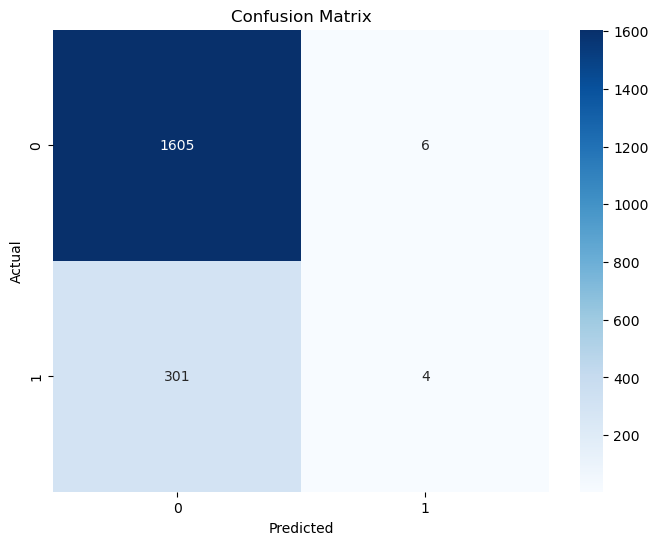

LogisticRegression Classifier Metrics:
AUC: 0.5046951796562568
Accuracy: 0.8397703549060542
Precision: 0.7717051635643513
Recall: 0.8397703549060542
Specificity: 0.16962000440645908
F1 Score: 0.77146208330946
Classification Report:
               precision    recall  f1-score   support

           0       0.84      1.00      0.91      1611
           1       0.40      0.01      0.03       305

    accuracy                           0.84      1916
   macro avg       0.62      0.50      0.47      1916
weighted avg       0.77      0.84      0.77      1916

----------------------------------
1605 6 301 4
pod:  0.013114754098360656
pof:  0.0037243947858473
AUC:  0.5046951796562567
accuracy:  0.8397703549060542
precision:  0.4
recall:  0.013114754098360656
specificity:  0.9962756052141527
F1:  0.025396825396825397


In [40]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.metrics import roc_auc_score
from imblearn.metrics import specificity_score
import matplotlib.pyplot as plt
import seaborn as sns

# Create a LogisticRegression instance
#logistic_reg = LogisticRegression(random_state=42)
#logistic_reg = LogisticRegression(C=100, penalty='l1', solver='liblinear')
logistic_reg = LogisticRegression(C=1, multi_class='ovr', penalty='l1', solver='liblinear')

# Print all parameter
print(logistic_reg.get_params())

# Train the logistic regression model
logistic_reg.fit(x_train, y_train)

# Predict on the test set
y_pred = logistic_reg.predict(x_test)



# Calculate AUC
auc = roc_auc_score(y_test, y_pred)
# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
# Calculate precision, recall, specificity, and F1 score
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
specificity=specificity_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

 

# Generate a classification report
classification_rep = classification_report(y_test, y_pred)

# Generate a confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Print evaluation metrics separately
print("LogisticRegression Classifier Metrics:")
print("AUC:", auc) 
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("Specificity:", specificity)
print("F1 Score:", f1) 

# Print the classification report
print("Classification Report:\n", classification_rep)


print('----------------------------------')
tn, fp, fn, tp  = confusion_matrix(y_test, y_pred).ravel()
print(tn, fp, fn, tp)

pod=tp/(tp+fn)
print('pod: ',pod)

pof=fp/(fp+tn)
print ('pof: ',pof)

auc_val=(1+pod-pof)/2
print ('AUC: ',auc_val)

accuracy_val=(tp+tn)/(tp+fn+fp+tn)
print ('accuracy: ',accuracy_val)

precision_val=tp/(tp+fp)  
print ('precision: ',precision_val)
 
recall_val = tp / (tp + fn)
print ('recall: ',recall_val)

specificity_val=tn/(fp+tn)
print ('specificity: ',specificity_val)

F1_val=(2*precision_val*recall_val)/(precision_val+recall_val)
print ('F1: ',F1_val)

List = ['Bank_loan_9578', 'RAW', 'LR', round(auc,3), round(accuracy,3), round(specificity_val,3), round(precision,3), round(recall,3),round(f1,3)]
with open('RESULT_FROM_PGROGRAM_Bank_loan_9578.csv', 'a') as f_object:
 
    # Pass this file object to csv.writer()
    # and get a writer object
    writer_object = writer(f_object)
 
    # Pass the list as an argument into
    # the writerow()
    writer_object.writerow(List)
 
    # Close the file object
    f_object.close()

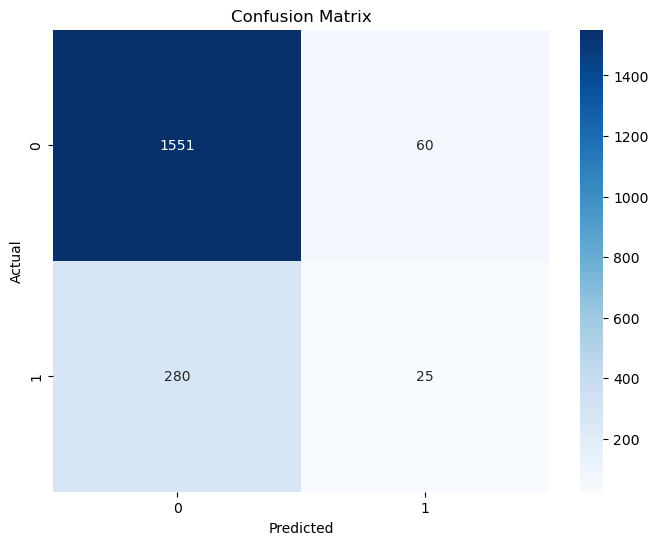

Decision Tree Classifier Metrics:
AUC: 0.5223616326281406
Accuracy: 0.8225469728601252
Precision: 0.7590546453471344
Recall: 0.8225469728601252
Specificity: 0.22217629239615586
F1 Score: 0.7781671919699163
classification Report:
               precision    recall  f1-score   support

           0       0.85      0.96      0.90      1611
           1       0.29      0.08      0.13       305

    accuracy                           0.82      1916
   macro avg       0.57      0.52      0.51      1916
weighted avg       0.76      0.82      0.78      1916

----------------------------------
1551 60 280 25
pod:  0.08196721311475409
pof:  0.037243947858473
AUC:  0.5223616326281406
accuracy:  0.8225469728601252
precision:  0.29411764705882354
recall:  0.08196721311475409
specificity:  0.962756052141527
F1:  0.12820512820512822


In [41]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.metrics import roc_auc_score
from imblearn.metrics import specificity_score
import matplotlib.pyplot as plt
import seaborn as sns

# Create a DecisionTreeClassifier instance
#decision_tree = DecisionTreeClassifier(random_state=42)
decision_tree = DecisionTreeClassifier(max_depth=10, min_samples_leaf=4, min_samples_split=10)


# Train the decision tree model
decision_tree.fit(x_train, y_train)

# Predict on the test set
y_pred = decision_tree.predict(x_test)


# Calculate AUC
auc = roc_auc_score(y_test, y_pred)
# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
# Calculate precision, recall, specificity, and F1 score
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
specificity=specificity_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')


# Generate a classification report
classification_rep = classification_report(y_test, y_pred)

# Generate a confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Print evaluation metrics separately
print("Decision Tree Classifier Metrics:")
print("AUC:", auc) 
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("Specificity:", specificity)
print("F1 Score:", f1) 


# Print the classification report
print("classification Report:\n", classification_rep)


print('----------------------------------')
tn, fp, fn, tp  = confusion_matrix(y_test, y_pred).ravel()
print(tn, fp, fn, tp)

pod=tp/(tp+fn)
print('pod: ',pod)

pof=fp/(fp+tn)
print ('pof: ',pof)

auc_val=(1+pod-pof)/2
print ('AUC: ',auc_val)

accuracy_val=(tp+tn)/(tp+fn+fp+tn)
print ('accuracy: ',accuracy_val)

precision_val=tp/(tp+fp)  
print ('precision: ',precision_val)
 
recall_val = tp / (tp + fn)
print ('recall: ',recall_val)

specificity_val=tn/(fp+tn)
print ('specificity: ',specificity_val)

F1_val=(2*precision_val*recall_val)/(precision_val+recall_val)
print ('F1: ',F1_val)

List = ['Bank_loan_9578', 'RAW', 'DTree', round(auc,3), round(accuracy,3), round(specificity_val,3), round(precision,3), round(recall,3),round(f1,3)]
with open('RESULT_FROM_PGROGRAM_Bank_loan_9578.csv', 'a') as f_object:
 
    # Pass this file object to csv.writer()
    # and get a writer object
    writer_object = writer(f_object)
 
    # Pass the list as an argument into
    # the writerow()
    writer_object.writerow(List)
 
    # Close the file object
    f_object.close()

{'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': 80, 'max_features': 3, 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 4, 'min_samples_split': 10, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 300, 'n_jobs': None, 'oob_score': False, 'random_state': None, 'verbose': 0, 'warm_start': False}


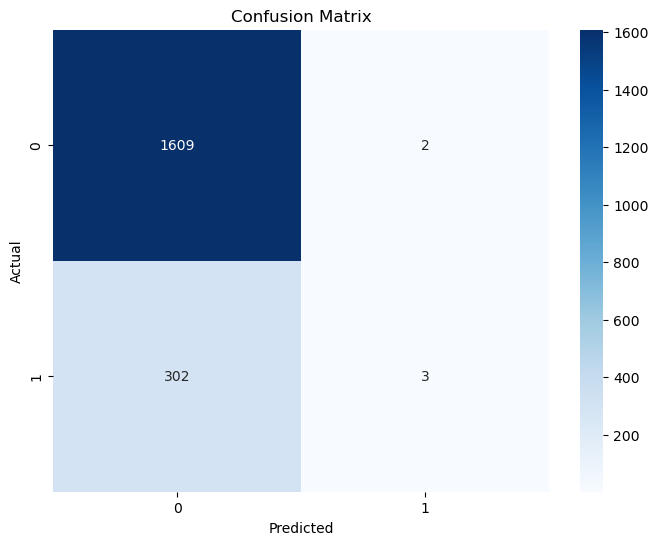

RandomForest Classifier Metrics:
AUC: 0.5042973003225775
Accuracy: 0.8413361169102297
Precision: 0.803449756327776
Recall: 0.8413361169102297
Specificity: 0.16725848373492508
F1 Score: 0.7713206758369289
classification Report:
               precision    recall  f1-score   support

           0       0.84      1.00      0.91      1611
           1       0.60      0.01      0.02       305

    accuracy                           0.84      1916
   macro avg       0.72      0.50      0.47      1916
weighted avg       0.80      0.84      0.77      1916

----------------------------------
1609 2 302 3
pod:  0.009836065573770493
pof:  0.0012414649286157666
AUC:  0.5042973003225774
accuracy:  0.8413361169102297
precision:  0.6
recall:  0.009836065573770493
specificity:  0.9987585350713842
F1:  0.01935483870967742


In [42]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.metrics import roc_auc_score
from imblearn.metrics import specificity_score
import matplotlib.pyplot as plt
import seaborn as sns

# Create a RandomForestClassifier instance
#random_forest = RandomForestClassifier(random_state=42)
random_forest = RandomForestClassifier(max_depth=80, max_features=3, min_samples_leaf=4, min_samples_split=10, n_estimators=300)
 

print(random_forest.get_params())

# Train the random forest model
random_forest.fit(x_train, y_train)

# Predict on the test set
y_pred = random_forest.predict(x_test)


# Calculate AUC
auc = roc_auc_score(y_test, y_pred)
# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
# Calculate precision, recall, specificity, and F1 score
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
specificity=specificity_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')


# Generate a classification report
classification_rep = classification_report(y_test, y_pred)

# Generate a confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Print evaluation metrics separately
print("RandomForest Classifier Metrics:")
print("AUC:", auc) 
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("Specificity:", specificity)
print("F1 Score:", f1) 


# Print the classification report
print("classification Report:\n", classification_rep)


print('----------------------------------')
tn, fp, fn, tp  = confusion_matrix(y_test, y_pred).ravel()
print(tn, fp, fn, tp)

pod=tp/(tp+fn)
print('pod: ',pod)

pof=fp/(fp+tn)
print ('pof: ',pof)

auc_val=(1+pod-pof)/2
print ('AUC: ',auc_val)

accuracy_val=(tp+tn)/(tp+fn+fp+tn)
print ('accuracy: ',accuracy_val)

precision_val=tp/(tp+fp)  
print ('precision: ',precision_val)
 
recall_val = tp / (tp + fn)
print ('recall: ',recall_val)

specificity_val=tn/(fp+tn)
print ('specificity: ',specificity_val)

F1_val=(2*precision_val*recall_val)/(precision_val+recall_val)
print ('F1: ',F1_val)

List = ['Bank_loan_9578', 'RAW', 'RF', round(auc,3), round(accuracy,3), round(specificity_val,3), round(precision,3), round(recall,3),round(f1,3)]
with open('RESULT_FROM_PGROGRAM_Bank_loan_9578.csv', 'a') as f_object:
 
    # Pass this file object to csv.writer()
    # and get a writer object
    writer_object = writer(f_object)
 
    # Pass the list as an argument into
    # the writerow()
    writer_object.writerow(List)
 
    # Close the file object
    f_object.close()

{'C': 1, 'break_ties': False, 'cache_size': 200, 'class_weight': None, 'coef0': 0.0, 'decision_function_shape': 'ovr', 'degree': 3, 'gamma': 'scale', 'kernel': 'rbf', 'max_iter': -1, 'probability': False, 'random_state': None, 'shrinking': True, 'tol': 0.001, 'verbose': False}


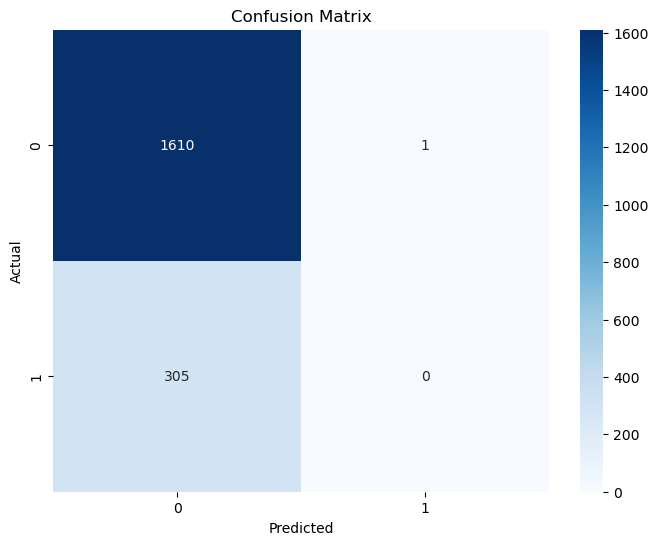

SVC Classifier Metrics:
AUC: 0.49968963376784603
Accuracy: 0.8402922755741128
Precision: 0.7068986192949847
Recall: 0.8402922755741128
Specificity: 0.15908699196157935
F1 Score: 0.767845068604592
classification Report:
               precision    recall  f1-score   support

           0       0.84      1.00      0.91      1611
           1       0.00      0.00      0.00       305

    accuracy                           0.84      1916
   macro avg       0.42      0.50      0.46      1916
weighted avg       0.71      0.84      0.77      1916

----------------------------------
1610 1 305 0
pod:  0.0
pof:  0.0006207324643078833
AUC:  0.49968963376784603
accuracy:  0.8402922755741128
precision:  0.0
recall:  0.0
specificity:  0.9993792675356921
F1:  nan


C:\Users\Joy\AppData\Local\Temp\ipykernel_22264\364540530.py:86: RuntimeWarning: invalid value encountered in double_scalars
  F1_val=(2*precision_val*recall_val)/(precision_val+recall_val)


In [43]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.metrics import roc_auc_score
from imblearn.metrics import specificity_score
import matplotlib.pyplot as plt
import seaborn as sns

# Create an SVC (Support Vector Classification) instance
#svm_classifier = SVC(random_state=42)
svm_classifier = SVC(C=1)


print(svm_classifier.get_params())

# Train the SVM model
svm_classifier.fit(x_train, y_train)

# Predict on the test set
y_pred = svm_classifier.predict(x_test)


# Calculate AUC
auc = roc_auc_score(y_test, y_pred)
# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
# Calculate precision, recall, specificity, and F1 score
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
specificity=specificity_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')


# Generate a classification report
classification_rep = classification_report(y_test, y_pred)

# Generate a confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Print evaluation metrics separately
print("SVC Classifier Metrics:")
print("AUC:", auc) 
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("Specificity:", specificity)
print("F1 Score:", f1) 


# Print the classification report
print("classification Report:\n", classification_rep)


print('----------------------------------')
tn, fp, fn, tp  = confusion_matrix(y_test, y_pred).ravel()
print(tn, fp, fn, tp)

pod=tp/(tp+fn)
print('pod: ',pod)

pof=fp/(fp+tn)
print ('pof: ',pof)

auc_val=(1+pod-pof)/2
print ('AUC: ',auc_val)

accuracy_val=(tp+tn)/(tp+fn+fp+tn)
print ('accuracy: ',accuracy_val)

precision_val=tp/(tp+fp)  
print ('precision: ',precision_val)
 
recall_val = tp / (tp + fn)
print ('recall: ',recall_val)

specificity_val=tn/(fp+tn)
print ('specificity: ',specificity_val)

F1_val=(2*precision_val*recall_val)/(precision_val+recall_val)
print ('F1: ',F1_val)

List = ['Bank_loan_9578', 'RAW', 'SVM', round(auc,3), round(accuracy,3), round(specificity_val,3), round(precision,3), round(recall,3),round(f1,3)]
with open('RESULT_FROM_PGROGRAM_Bank_loan_9578.csv', 'a') as f_object:
 
    # Pass this file object to csv.writer()
    # and get a writer object
    writer_object = writer(f_object)
 
    # Pass the list as an argument into
    # the writerow()
    writer_object.writerow(List)
 
    # Close the file object
    f_object.close()

{'algorithm': 'auto', 'leaf_size': 30, 'metric': 'minkowski', 'metric_params': None, 'n_jobs': None, 'n_neighbors': 5, 'p': 2, 'weights': 'uniform'}


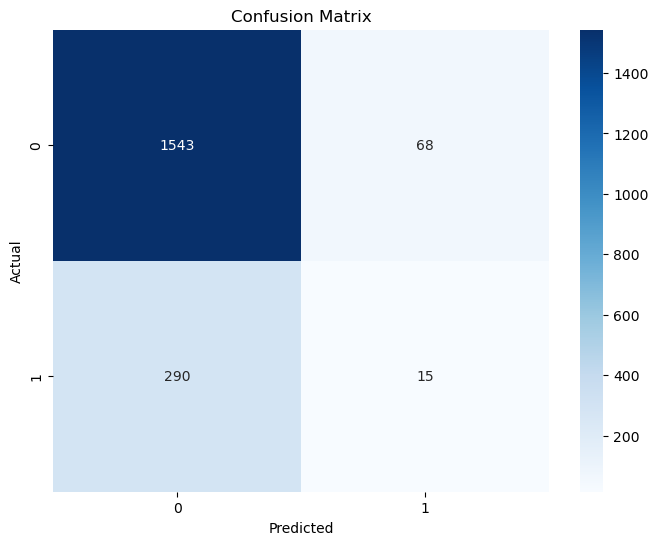

KNeighbors Classifier Metrics:
AUC: 0.5034852601479582
Accuracy: 0.8131524008350731
Precision: 0.7365570101871324
Recall: 0.8131524008350731
Specificity: 0.19381811946084335
F1 Score: 0.7657206689733489
KNeighbors Report:
               precision    recall  f1-score   support

           0       0.84      0.96      0.90      1611
           1       0.18      0.05      0.08       305

    accuracy                           0.81      1916
   macro avg       0.51      0.50      0.49      1916
weighted avg       0.74      0.81      0.77      1916

----------------------------------
1543 68 290 15
pod:  0.04918032786885246
pof:  0.04220980757293606
AUC:  0.5034852601479582
accuracy:  0.8131524008350731
precision:  0.18072289156626506
recall:  0.04918032786885246
specificity:  0.957790192427064
F1:  0.07731958762886598


In [44]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.metrics import roc_auc_score
from imblearn.metrics import specificity_score
import matplotlib.pyplot as plt
import seaborn as sns

# Create a KNeighborsClassifier instance with a specified number of neighbors (e.g., n_neighbors=5)
knn_classifier = KNeighborsClassifier(n_neighbors=5)
#knn_classifier = KNeighborsClassifier(metric='euclidean', n_neighbors=27)

print(knn_classifier.get_params())

# Train the KNN model
knn_classifier.fit(x_train, y_train)

# Predict on the test set
y_pred = knn_classifier.predict(x_test)


# Calculate AUC
auc = roc_auc_score(y_test, y_pred)
# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
# Calculate precision, recall, specificity, and F1 score
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
specificity=specificity_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

# Generate a classification report
classification_rep = classification_report(y_test, y_pred)

# Generate a confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Print evaluation metrics separately
print("KNeighbors Classifier Metrics:")
print("AUC:", auc) 
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("Specificity:", specificity)
print("F1 Score:", f1) 


# Print the classification report
print("KNeighbors Report:\n", classification_rep)


print('----------------------------------')
tn, fp, fn, tp  = confusion_matrix(y_test, y_pred).ravel()
print(tn, fp, fn, tp)

pod=tp/(tp+fn)
print('pod: ',pod)

pof=fp/(fp+tn)
print ('pof: ',pof)

auc_val=(1+pod-pof)/2
print ('AUC: ',auc_val)

accuracy_val=(tp+tn)/(tp+fn+fp+tn)
print ('accuracy: ',accuracy_val)

precision_val=tp/(tp+fp)  
print ('precision: ',precision_val)
 
recall_val = tp / (tp + fn)
print ('recall: ',recall_val)

specificity_val=tn/(fp+tn)
print ('specificity: ',specificity_val)

F1_val=(2*precision_val*recall_val)/(precision_val+recall_val)
print ('F1: ',F1_val)

List = ['Bank_loan_9578', 'RAW', 'KNN', round(auc,3), round(accuracy,3), round(specificity_val,3), round(precision,3), round(recall,3),round(f1,3)]
with open('RESULT_FROM_PGROGRAM_Bank_loan_9578.csv', 'a') as f_object:
 
    # Pass this file object to csv.writer()
    # and get a writer object
    writer_object = writer(f_object)
 
    # Pass the list as an argument into
    # the writerow()
    writer_object.writerow(List)
 
    # Close the file object
    f_object.close()

{'ccp_alpha': 0.0, 'criterion': 'friedman_mse', 'init': None, 'learning_rate': 0.1, 'loss': 'log_loss', 'max_depth': 3, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'n_iter_no_change': None, 'random_state': 42, 'subsample': 1.0, 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': 0, 'warm_start': False}


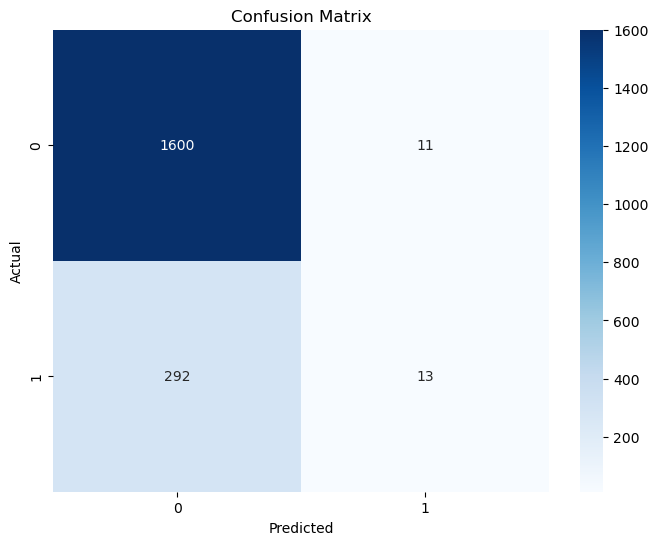

GradientBoosting Classifier Metrics:
AUC: 0.5178974468561426
Accuracy: 0.8418580375782881
Precision: 0.7972735897843316
Recall: 0.8418580375782881
Specificity: 0.1939368561339973
F1 Score: 0.7806660816463988
GradientBoostingClassifier Report:
               precision    recall  f1-score   support

           0       0.85      0.99      0.91      1611
           1       0.54      0.04      0.08       305

    accuracy                           0.84      1916
   macro avg       0.69      0.52      0.50      1916
weighted avg       0.80      0.84      0.78      1916

----------------------------------
1600 11 292 13
pod:  0.04262295081967213
pof:  0.006828057107386716
AUC:  0.5178974468561427
accuracy:  0.8418580375782881
precision:  0.5416666666666666
recall:  0.04262295081967213
specificity:  0.9931719428926132
F1:  0.0790273556231003


In [45]:
 # Importing necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
 
# Initialize GradientBoosting classifier
#gb_clf = GradientBoostingClassifier(random_state=42)
gb_clf = GradientBoostingClassifier(n_estimators=100, random_state=42)
#gb_clf = GradientBoostingClassifier(min_samples_leaf=2, n_estimators=50)
#gb_clf = GradientBoostingClassifier(learning_rate=0.01, max_depth=7, min_samples_leaf=4, min_samples_split=5, n_estimators=50)



print(gb_clf.get_params())

# Train GradientBoosting classifier
gb_clf.fit(x_train, y_train)
  

# Predict on the test set
y_pred = gb_clf.predict(x_test)

# Calculate AUC
auc = roc_auc_score(y_test, y_pred)
# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
# Calculate precision, recall, specificity, and F1 score
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
specificity=specificity_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

# Generate a classification report
classification_rep = classification_report(y_test, y_pred)

# Generate a confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Print evaluation metrics separately
print("GradientBoosting Classifier Metrics:")
print("AUC:", auc) 
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("Specificity:", specificity)
print("F1 Score:", f1) 


# Print the classification report
print("GradientBoostingClassifier Report:\n", classification_rep)


print('----------------------------------')
tn, fp, fn, tp  = confusion_matrix(y_test, y_pred).ravel()
print(tn, fp, fn, tp)

pod=tp/(tp+fn)
print('pod: ',pod)

pof=fp/(fp+tn)
print ('pof: ',pof)

auc_val=(1+pod-pof)/2
print ('AUC: ',auc_val)

accuracy_val=(tp+tn)/(tp+fn+fp+tn)
print ('accuracy: ',accuracy_val)

precision_val=tp/(tp+fp)  
print ('precision: ',precision_val)
 
recall_val = tp / (tp + fn)
print ('recall: ',recall_val)

specificity_val=tn/(fp+tn)
print ('specificity: ',specificity_val)

F1_val=(2*precision_val*recall_val)/(precision_val+recall_val)
print ('F1: ',F1_val)

List = ['Bank_loan_9578', 'RAW', 'GB', round(auc,3), round(accuracy,3), round(specificity_val,3), round(precision,3), round(recall,3),round(f1,3)]
with open('RESULT_FROM_PGROGRAM_Bank_loan_9578.csv', 'a') as f_object:
 
    # Pass this file object to csv.writer()
    # and get a writer object
    writer_object = writer(f_object)
 
    # Pass the list as an argument into
    # the writerow()
    writer_object.writerow(List)
 
    # Close the file object
    f_object.close()

{'objective': 'binary:logistic', 'base_score': None, 'booster': None, 'callbacks': None, 'colsample_bylevel': None, 'colsample_bynode': None, 'colsample_bytree': None, 'device': None, 'early_stopping_rounds': None, 'enable_categorical': False, 'eval_metric': None, 'feature_types': None, 'gamma': None, 'grow_policy': None, 'importance_type': None, 'interaction_constraints': None, 'learning_rate': None, 'max_bin': None, 'max_cat_threshold': None, 'max_cat_to_onehot': None, 'max_delta_step': None, 'max_depth': None, 'max_leaves': None, 'min_child_weight': None, 'missing': nan, 'monotone_constraints': None, 'multi_strategy': None, 'n_estimators': None, 'n_jobs': None, 'num_parallel_tree': None, 'random_state': 42, 'reg_alpha': None, 'reg_lambda': None, 'sampling_method': None, 'scale_pos_weight': None, 'subsample': None, 'tree_method': None, 'validate_parameters': None, 'verbosity': None}


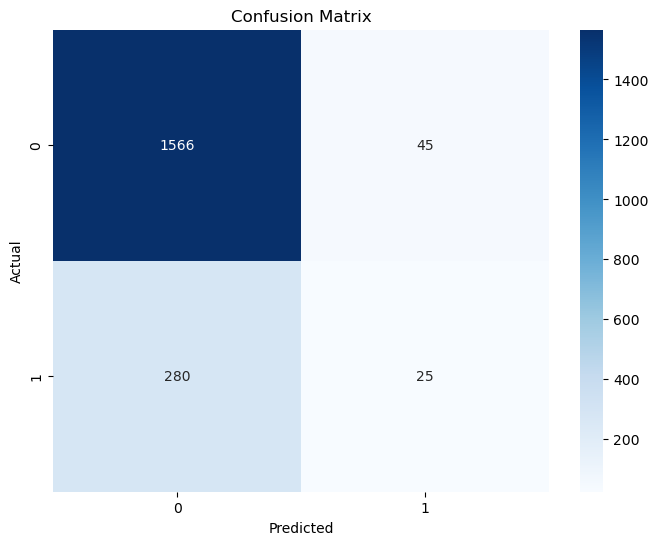

XGB Classifier Metrics:
AUC: 0.5270171261104497
Accuracy: 0.8303757828810021
Precision: 0.7701321547399056
Recall: 0.8303757828810021
Specificity: 0.22365846933989728
F1 Score: 0.7829922203575129
  Report:
               precision    recall  f1-score   support

           0       0.85      0.97      0.91      1611
           1       0.36      0.08      0.13       305

    accuracy                           0.83      1916
   macro avg       0.60      0.53      0.52      1916
weighted avg       0.77      0.83      0.78      1916

----------------------------------
1566 45 280 25
pod:  0.08196721311475409
pof:  0.027932960893854747
AUC:  0.5270171261104497
accuracy:  0.8303757828810021
precision:  0.35714285714285715
recall:  0.08196721311475409
specificity:  0.9720670391061452
F1:  0.13333333333333333


In [46]:
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.metrics import roc_auc_score
from imblearn.metrics import specificity_score
import matplotlib.pyplot as plt
import seaborn as sns

# Create an XGBClassifier instance
xgb_classifier = XGBClassifier(random_state=42)

print(xgb_classifier.get_params())

# Train the XGBoost model
xgb_classifier.fit(x_train, y_train)

# Predict on the test set
y_pred = xgb_classifier.predict(x_test)


# Calculate AUC
auc = roc_auc_score(y_test, y_pred)
# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
# Calculate precision, recall, specificity, and F1 score
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
specificity=specificity_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')


# Generate a classification report
classification_rep = classification_report(y_test, y_pred)

# Generate a confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Print evaluation metrics separately
print("XGB Classifier Metrics:")
print("AUC:", auc) 
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("Specificity:", specificity)
print("F1 Score:", f1) 


# Print the classification report
print("  Report:\n", classification_rep)


print('----------------------------------')
tn, fp, fn, tp  = confusion_matrix(y_test, y_pred).ravel()
print(tn, fp, fn, tp)

pod=tp/(tp+fn)
print('pod: ',pod)

pof=fp/(fp+tn)
print ('pof: ',pof)

auc_val=(1+pod-pof)/2
print ('AUC: ',auc_val)

accuracy_val=(tp+tn)/(tp+fn+fp+tn)
print ('accuracy: ',accuracy_val)

precision_val=tp/(tp+fp)  
print ('precision: ',precision_val)
 
recall_val = tp / (tp + fn)
print ('recall: ',recall_val)

specificity_val=tn/(fp+tn)
print ('specificity: ',specificity_val)

F1_val=(2*precision_val*recall_val)/(precision_val+recall_val)
print ('F1: ',F1_val)

List = ['Bank_loan_9578', 'RAW', 'XGB', round(auc,3), round(accuracy,3), round(specificity_val,3), round(precision,3), round(recall,3),round(f1,3)]
with open('RESULT_FROM_PGROGRAM_Bank_loan_9578.csv', 'a') as f_object:
 
    # Pass this file object to csv.writer()
    # and get a writer object
    writer_object = writer(f_object)
 
    # Pass the list as an argument into
    # the writerow()
    writer_object.writerow(List)
 
    # Close the file object
    f_object.close()

In [47]:
import tensorflow as tf
print(tf.__version__)

2.14.0


Epoch 1/10
613/613 [==============================] - 6s 9ms/step - loss: 6.5251 - accuracy: 0.7665 - val_loss: 0.5280 - val_accuracy: 0.8389
Epoch 2/10
613/613 [==============================] - 5s 9ms/step - loss: 0.4886 - accuracy: 0.8339 - val_loss: 0.4620 - val_accuracy: 0.8415
Epoch 3/10
613/613 [==============================] - 5s 9ms/step - loss: 0.4638 - accuracy: 0.8380 - val_loss: 0.4410 - val_accuracy: 0.8415
Epoch 4/10
613/613 [==============================] - 6s 9ms/step - loss: 0.4439 - accuracy: 0.8393 - val_loss: 0.4367 - val_accuracy: 0.8421
Epoch 5/10
613/613 [==============================] - 5s 9ms/step - loss: 0.4535 - accuracy: 0.8390 - val_loss: 0.4358 - val_accuracy: 0.8421
Epoch 6/10
613/613 [==============================] - 5s 9ms/step - loss: 0.4423 - accuracy: 0.8391 - val_loss: 0.4363 - val_accuracy: 0.8415
Epoch 7/10
613/613 [==============================] - 6s 9ms/step - loss: 1.0539 - accuracy: 0.8303 - val_loss: 0.4377 - val_accuracy: 0.8415
Epoch 

C:\Program Files\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Program Files\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Program Files\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Program Files\anaconda3\Lib\site-packages\sklearn\metrics\_

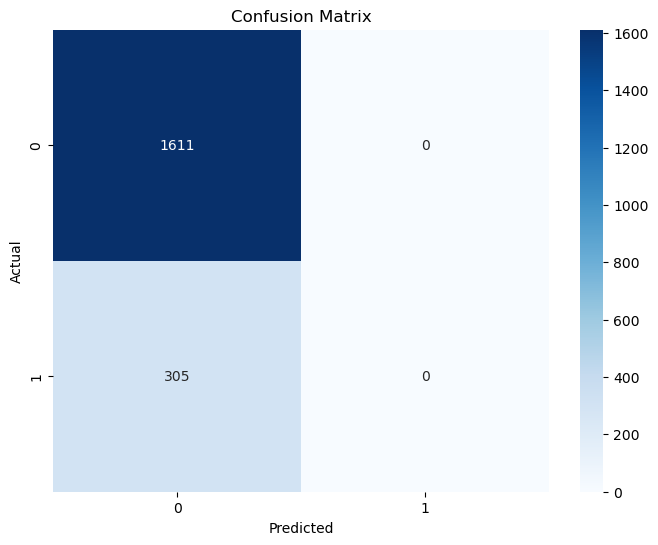

FNN   Metrics:
AUC: 0.5
Accuracy: 0.8408141962421712
Precision: 0.7069685126023684
Recall: 0.8408141962421712
Specificity: 0.15918580375782881
F1 Score: 0.7681041509192729
GaussianNB Report:
               precision    recall  f1-score   support

           0       0.84      1.00      0.91      1611
           1       0.00      0.00      0.00       305

    accuracy                           0.84      1916
   macro avg       0.42      0.50      0.46      1916
weighted avg       0.71      0.84      0.77      1916

----------------------------------
1611 0 305 0
pod:  0.0
pof:  0.0
AUC:  0.5
accuracy:  0.8408141962421712
precision:  nan
recall:  0.0
specificity:  1.0
F1:  nan


C:\Users\Joy\AppData\Local\Temp\ipykernel_22264\2315092358.py:94: RuntimeWarning: invalid value encountered in longlong_scalars
  precision_val=tp/(tp+fp)


In [48]:
#FNN
 
from keras.models import Sequential
from keras.layers import Dense

from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.metrics import roc_auc_score
from imblearn.metrics import specificity_score

#from tensorflow.keras.models import Sequential
#from tensorflow.keras.layers import Dense
#create model

#x_train, x_test, y_train, y_test 

model = Sequential()
#get number of columns in training data
n_cols = x_test.shape[1]
model.add(Dense(10, activation='relu', input_shape=(n_cols,)))
model.add(Dense(250, activation='relu'))
model.add(Dense(250, activation='relu'))
model.add(Dense(250, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
#compile model using mse as a measure of model performance
#model.compile(optimizer='adam', loss='mean_squared_error')
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
#model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])  
from keras.callbacks import EarlyStopping
#set early stopping monitor so the model stops training when it won't improve anymore
early_stopping_monitor = EarlyStopping(patience=3)
#train model
 
model.fit(x_train, y_train, validation_split=0.2, epochs=10, batch_size=10, callbacks=[early_stopping_monitor])
# Predict on the test set
y_pred_step1 = model.predict(x_test)
y_pred=y_pred_step1.round()


# Calculate AUC
auc = roc_auc_score(y_test, y_pred)
# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
# Calculate precision, recall, specificity, and F1 score
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
specificity=specificity_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')


# Generate a classification report
classification_rep = classification_report(y_test, y_pred)

# Generate a confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Print evaluation metrics separately
print("FNN   Metrics:")
print("AUC:", auc) 
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("Specificity:", specificity)
print("F1 Score:", f1) 


# Print the classification report
print("GaussianNB Report:\n", classification_rep)


print('----------------------------------')
tn, fp, fn, tp  = confusion_matrix(y_test, y_pred).ravel()
print(tn, fp, fn, tp)

pod=tp/(tp+fn)
print('pod: ',pod)

pof=fp/(fp+tn)
print ('pof: ',pof)

auc_val=(1+pod-pof)/2
print ('AUC: ',auc_val)

accuracy_val=(tp+tn)/(tp+fn+fp+tn)
print ('accuracy: ',accuracy_val)

precision_val=tp/(tp+fp)  
print ('precision: ',precision_val)
 
recall_val = tp / (tp + fn)
print ('recall: ',recall_val)

specificity_val=tn/(fp+tn)
print ('specificity: ',specificity_val)

F1_val=(2*precision_val*recall_val)/(precision_val+recall_val)
print ('F1: ',F1_val)

List = ['Bank_loan_9578', 'RAW', 'FNN', round(auc,3), round(accuracy,3), round(specificity_val,3), round(precision,3), round(recall,3),round(f1,3)]
with open('RESULT_FROM_PGROGRAM_Bank_loan_9578.csv', 'a') as f_object:
 
    # Pass this file object to csv.writer()
    # and get a writer object
    writer_object = writer(f_object)
 
    # Pass the list as an argument into
    # the writerow()
    writer_object.writerow(List)
 
    # Close the file object
    f_object.close()

Epoch 1/100
240/240 [==============================] - 10s 32ms/step - loss: 0.3314
Epoch 2/100
240/240 [==============================] - 7s 30ms/step - loss: 0.1937
Epoch 3/100
240/240 [==============================] - 7s 30ms/step - loss: 0.1647
Epoch 4/100
240/240 [==============================] - 7s 30ms/step - loss: 0.1492
Epoch 5/100
240/240 [==============================] - 7s 31ms/step - loss: 0.1412
Epoch 6/100
240/240 [==============================] - 7s 31ms/step - loss: 0.1368
Epoch 7/100
240/240 [==============================] - 8s 32ms/step - loss: 0.1354
Epoch 8/100
240/240 [==============================] - 8s 34ms/step - loss: 0.1335
Epoch 9/100
240/240 [==============================] - 8s 33ms/step - loss: 0.1330
Epoch 10/100
240/240 [==============================] - 8s 32ms/step - loss: 0.1325
Epoch 11/100
240/240 [==============================] - 8s 33ms/step - loss: 0.1324
Epoch 12/100
240/240 [==============================] - 7s 30ms/step - loss: 0.1322


240/240 [==============================] - 7s 29ms/step - loss: 0.1308
Epoch 99/100
240/240 [==============================] - 7s 29ms/step - loss: 0.1314
Epoch 100/100
60/60 [==============================] - 1s 10ms/step


C:\Program Files\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Program Files\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Program Files\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Program Files\anaconda3\Lib\site-packages\sklearn\metrics\_

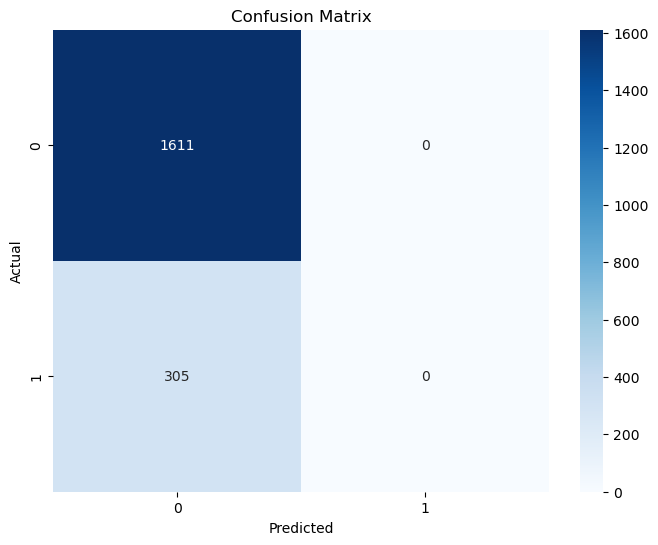

RNN Metrics:
AUC: 0.5
Accuracy: 0.8408141962421712
Precision: 0.7069685126023684
Recall: 0.8408141962421712
Specificity: 0.15918580375782881
F1 Score: 0.7681041509192729
RNN Report:
               precision    recall  f1-score   support

           0       0.84      1.00      0.91      1611
           1       0.00      0.00      0.00       305

    accuracy                           0.84      1916
   macro avg       0.42      0.50      0.46      1916
weighted avg       0.71      0.84      0.77      1916

----------------------------------
1611 0 305 0
pod:  0.0
pof:  0.0
AUC:  0.5
accuracy:  0.8408141962421712
precision:  nan
recall:  0.0
specificity:  1.0
F1:  nan


C:\Users\Joy\AppData\Local\Temp\ipykernel_22264\4249326622.py:95: RuntimeWarning: invalid value encountered in longlong_scalars
  precision_val=tp/(tp+fp)


In [49]:
#import libraries and packages:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import SimpleRNN
from keras.layers import Dropout

#Initialize RNN:
model = Sequential()

#Adding the first RNN layer and some Dropout regularization
model.add(SimpleRNN(units = 50, activation='tanh', return_sequences=True, input_shape= (x_train.shape[1],1)))
model.add(Dropout(0.2))

#Adding the second RNN layer and some Dropout regularization
model.add(SimpleRNN(units = 50, activation='tanh', return_sequences=True))
model.add(Dropout(0.2))

#Adding the third RNN layer and some Dropout regularization
model.add(SimpleRNN(units = 50, activation='tanh', return_sequences=True))
model.add(Dropout(0.2))

#Adding the fourth RNN layer and some Dropout regularization
model.add(SimpleRNN(units = 50))
model.add(Dropout(0.2))

#Adding the output layer
model.add(Dense(units = 1))

#Compile the RNN
model.compile(optimizer='adam', loss='mean_squared_error')

#Fitting the RNN to the Training set
model.fit(x_train, y_train, epochs=100, batch_size=32)

# Predict on the test set
y_pred_step1 = model.predict(x_test)
y_pred=y_pred_step1.round()


# Calculate AUC
auc = roc_auc_score(y_test, y_pred)
# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
# Calculate precision, recall, specificity, and F1 score
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
specificity=specificity_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')


# Generate a classification report
classification_rep = classification_report(y_test, y_pred)

# Generate a confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Print evaluation metrics separately
print("RNN Metrics:")
print("AUC:", auc) 
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("Specificity:", specificity)
print("F1 Score:", f1) 


# Print the classification report
print("RNN Report:\n", classification_rep)


print('----------------------------------')
tn, fp, fn, tp  = confusion_matrix(y_test, y_pred).ravel()
print(tn, fp, fn, tp)

pod=tp/(tp+fn)
print('pod: ',pod)

pof=fp/(fp+tn)
print ('pof: ',pof)

auc_val=(1+pod-pof)/2
print ('AUC: ',auc_val)

accuracy_val=(tp+tn)/(tp+fn+fp+tn)
print ('accuracy: ',accuracy_val)

precision_val=tp/(tp+fp)  
print ('precision: ',precision_val)
 
recall_val = tp / (tp + fn)
print ('recall: ',recall_val)

specificity_val=tn/(fp+tn)
print ('specificity: ',specificity_val)

F1_val=(2*precision_val*recall_val)/(precision_val+recall_val)
print ('F1: ',F1_val)

List = ['Bank_loan_9578', 'RAW', 'RNN-1', round(auc,3), round(accuracy,3), round(specificity_val,3), round(precision,3), round(recall,3),round(f1,3)]
with open('RESULT_FROM_PGROGRAM_Bank_loan_9578.csv', 'a') as f_object:
 
    # Pass this file object to csv.writer()
    # and get a writer object
    writer_object = writer(f_object)
 
    # Pass the list as an argument into
    # the writerow()
    writer_object.writerow(List)
 
    # Close the file object
    f_object.close()

{'bootstrap': False, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': 'sqrt', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'n_jobs': None, 'oob_score': False, 'random_state': 42, 'verbose': 0, 'warm_start': False}


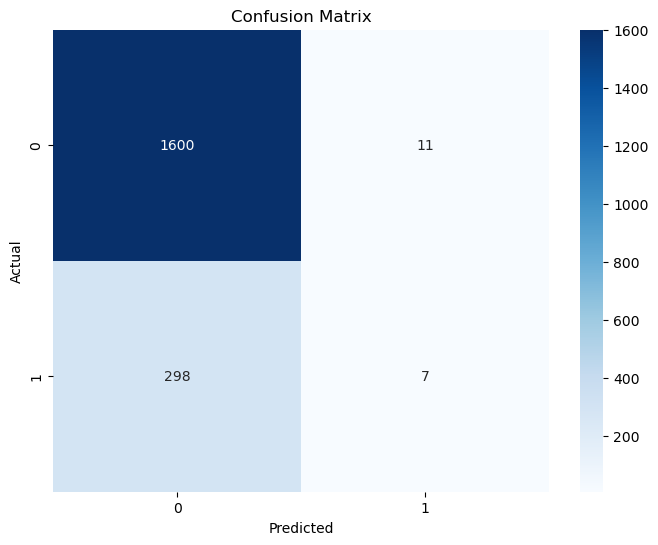

ExtraTreesClassifier Metrics:
AUC: 0.5080613812823722
Accuracy: 0.8387265135699373
Precision: 0.7707057557809696
Recall: 0.8387265135699373
Specificity: 0.17739624899480705
F1 Score: 0.7736724010274467
Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.99      0.91      1611
           1       0.39      0.02      0.04       305

    accuracy                           0.84      1916
   macro avg       0.62      0.51      0.48      1916
weighted avg       0.77      0.84      0.77      1916

----------------------------------
1600 11 298 7
pod:  0.022950819672131147
pof:  0.006828057107386716
AUC:  0.5080613812823722
accuracy:  0.8387265135699373
precision:  0.3888888888888889
recall:  0.022950819672131147
specificity:  0.9931719428926132
F1:  0.043343653250773995


In [50]:
from sklearn.ensemble import ExtraTreesClassifier
et_clf = ExtraTreesClassifier(n_estimators=100, random_state=42)



print(et_clf.get_params())

et_clf.fit(x_train, y_train)
# Predict on the test set
y_pred = et_clf.predict(x_test)

# Calculate AUC
auc = roc_auc_score(y_test, y_pred)
# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
# Calculate precision, recall, specificity, and F1 score
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
specificity=specificity_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')


# Generate a classification report
classification_rep = classification_report(y_test, y_pred)

# Generate a confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Print evaluation metrics separately
print("ExtraTreesClassifier Metrics:")
print("AUC:", auc) 
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("Specificity:", specificity)
print("F1 Score:", f1) 


# Print the classification report
print("Classification Report:\n", classification_rep)


print('----------------------------------')
tn, fp, fn, tp  = confusion_matrix(y_test, y_pred).ravel()
print(tn, fp, fn, tp)

pod=tp/(tp+fn)
print('pod: ',pod)

pof=fp/(fp+tn)
print ('pof: ',pof)

auc_val=(1+pod-pof)/2
print ('AUC: ',auc_val)

accuracy_val=(tp+tn)/(tp+fn+fp+tn)
print ('accuracy: ',accuracy_val)

precision_val=tp/(tp+fp)  
print ('precision: ',precision_val)
 
recall_val = tp / (tp + fn)
print ('recall: ',recall_val)

specificity_val=tn/(fp+tn)
print ('specificity: ',specificity_val)

F1_val=(2*precision_val*recall_val)/(precision_val+recall_val)
print ('F1: ',F1_val)

List = ['Bank_loan_9578', 'RAW', 'ExtraTrees', round(auc,3), round(accuracy,3), round(specificity_val,3), round(precision,3), round(recall,3),round(f1,3)]
with open('RESULT_FROM_PGROGRAM_Bank_loan_9578.csv', 'a') as f_object:
 
    # Pass this file object to csv.writer()
    # and get a writer object
    writer_object = writer(f_object)
 
    # Pass the list as an argument into
    # the writerow()
    writer_object.writerow(List)
 
    # Close the file object
    f_object.close()

C:\Program Files\anaconda3\Lib\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


Decision Tree Classifier Accuracy: 0.7484342379958246
Random Forest Classifier Accuracy: 0.8392484342379958
Bagging Classifier with RF Tree Accuracy: 0.8408141962421712
Voting Classifier Accuracy: 0.8397703549060542


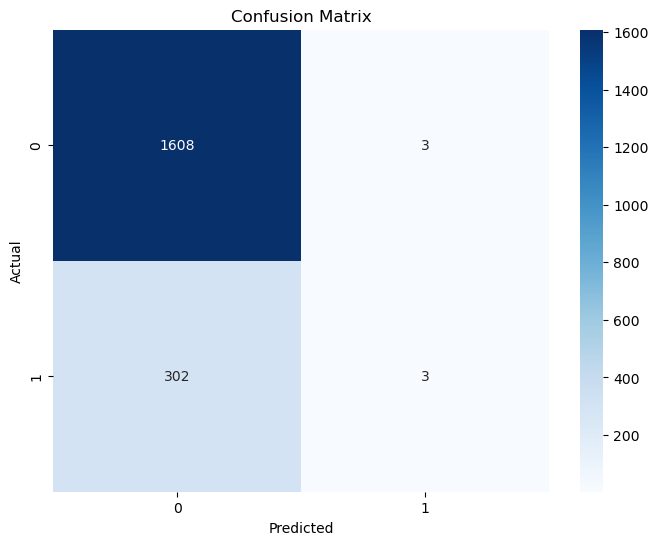

Bagging Classifier Metrics:
AUC: 0.5039869340904235
Accuracy: 0.8408141962421712
Precision: 0.7874616074063548
Recall: 0.8408141962421712
Specificity: 0.16715967193867565
F1 Score: 0.7710513572957275
Classification Report:
               precision    recall  f1-score   support

           0       0.84      1.00      0.91      1611
           1       0.50      0.01      0.02       305

    accuracy                           0.84      1916
   macro avg       0.67      0.50      0.47      1916
weighted avg       0.79      0.84      0.77      1916

----------------------------------
1608 3 302 3
pod:  0.009836065573770493
pof:  0.00186219739292365
AUC:  0.5039869340904235
accuracy:  0.8408141962421712
precision:  0.5
recall:  0.009836065573770493
specificity:  0.9981378026070763
F1:  0.01929260450160772


In [51]:
# Importing necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, VotingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder


# Initialize base classifiers
dt_clf = DecisionTreeClassifier(random_state=42)
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)

# Initialize Bagging classifier with Decision Tree as base estimator
bagging_dt_clf = BaggingClassifier(base_estimator=rf_clf, n_estimators=100, random_state=42)

# Initialize Voting classifier with Decision Tree and Random Forest as base estimators
voting_clf = VotingClassifier(estimators=[('dt', dt_clf), ('rf', rf_clf)], voting='hard')

# Train classifiers
dt_clf.fit(x_train, y_train)
rf_clf.fit(x_train, y_train)
bagging_dt_clf.fit(x_train, y_train)
voting_clf.fit(x_train, y_train)

# Make predictions
dt_predictions = dt_clf.predict(x_test)
rf_predictions = rf_clf.predict(x_test)
bagging_dt_predictions = bagging_dt_clf.predict(x_test)
voting_predictions = voting_clf.predict(x_test)

# Evaluate accuracy
dt_accuracy = accuracy_score(y_test, dt_predictions)
rf_accuracy = accuracy_score(y_test, rf_predictions)
bagging_dt_accuracy = accuracy_score(y_test, bagging_dt_predictions)
voting_accuracy = accuracy_score(y_test, voting_predictions)

print("Decision Tree Classifier Accuracy:", dt_accuracy)
print("Random Forest Classifier Accuracy:", rf_accuracy)
print("Bagging Classifier with RF Tree Accuracy:", bagging_dt_accuracy)
print("Voting Classifier Accuracy:", voting_accuracy)


y_pred=bagging_dt_predictions

# Calculate AUC
auc = roc_auc_score(y_test, y_pred)
# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
# Calculate precision, recall, specificity, and F1 score
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
specificity=specificity_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')


# Generate a classification report
classification_rep = classification_report(y_test, y_pred)

# Generate a confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Print evaluation metrics separately
print("Bagging Classifier Metrics:")
print("AUC:", auc) 
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("Specificity:", specificity)
print("F1 Score:", f1) 


# Print the classification report
print("Classification Report:\n", classification_rep)


print('----------------------------------')
tn, fp, fn, tp  = confusion_matrix(y_test, y_pred).ravel()
print(tn, fp, fn, tp)

pod=tp/(tp+fn)
print('pod: ',pod)

pof=fp/(fp+tn)
print ('pof: ',pof)

auc_val=(1+pod-pof)/2
print ('AUC: ',auc_val)

accuracy_val=(tp+tn)/(tp+fn+fp+tn)
print ('accuracy: ',accuracy_val)

precision_val=tp/(tp+fp)  
print ('precision: ',precision_val)
 
recall_val = tp / (tp + fn)
print ('recall: ',recall_val)

specificity_val=tn/(fp+tn)
print ('specificity: ',specificity_val)

F1_val=(2*precision_val*recall_val)/(precision_val+recall_val)
print ('F1: ',F1_val)


List = ['Bank_loan_9578', 'RAW', 'Bagging', round(auc,3), round(accuracy,3), round(specificity_val,3), round(precision,3), round(recall,3),round(f1,3)]
with open('RESULT_FROM_PGROGRAM_Bank_loan_9578.csv', 'a') as f_object:
 
    # Pass this file object to csv.writer()
    # and get a writer object
    writer_object = writer(f_object)
 
    # Pass the list as an argument into
    # the writerow()
    writer_object.writerow(List)
 
    # Close the file object
    f_object.close()

C:\Program Files\anaconda3\Lib\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


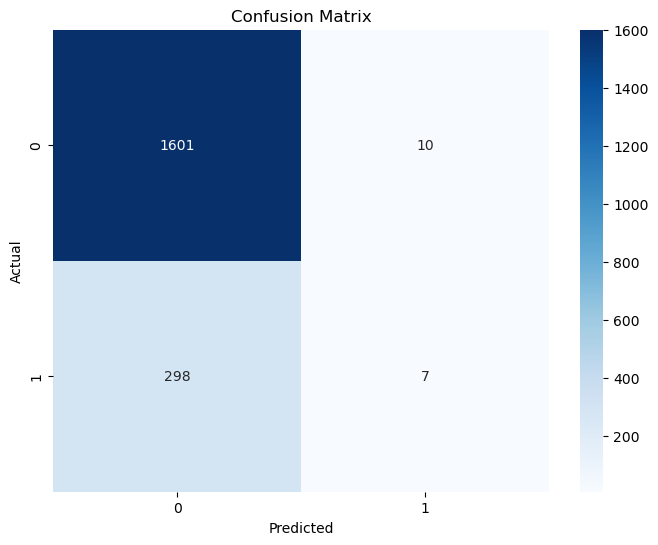

AdaBoost Classifier Metrics:
AUC: 0.5083717475145261
Accuracy: 0.8392484342379958
Precision: 0.7744167787527797
Recall: 0.8392484342379958
Specificity: 0.1774950607910565
F1 Score: 0.7739544712949451
Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.99      0.91      1611
           1       0.41      0.02      0.04       305

    accuracy                           0.84      1916
   macro avg       0.63      0.51      0.48      1916
weighted avg       0.77      0.84      0.77      1916

----------------------------------
1601 10 298 7
pod:  0.022950819672131147
pof:  0.006207324643078833
AUC:  0.5083717475145261
accuracy:  0.8392484342379958
precision:  0.4117647058823529
recall:  0.022950819672131147
specificity:  0.9937926753569212
F1:  0.043478260869565216


In [52]:
# Importing necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder

 
# Initialize base estimator (Decision Tree)
dt_clf = DecisionTreeClassifier(max_depth=1, random_state=42)

rf_clf = RandomForestClassifier(max_depth=100, random_state=42)

svm_clf = SVC(random_state=42)


# Initialize AdaBoost classifier
adaboost_clf = AdaBoostClassifier(base_estimator=rf_clf, n_estimators=100, random_state=42)
#adaboost_clf = AdaBoostClassifier(algorithm="SAMME", n_estimators=100, random_state=42)


# Train AdaBoost classifier
adaboost_clf.fit(x_train, y_train)

# Make predictions
adaboost_predictions = adaboost_clf.predict(x_test)

y_pred=adaboost_predictions

# Calculate AUC
auc = roc_auc_score(y_test, y_pred)
# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
# Calculate precision, recall, specificity, and F1 score
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
specificity=specificity_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')


# Generate a classification report
classification_rep = classification_report(y_test, y_pred)

# Generate a confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Print evaluation metrics separately
print("AdaBoost Classifier Metrics:")
print("AUC:", auc) 
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("Specificity:", specificity)
print("F1 Score:", f1) 


# Print the classification report
print("Classification Report:\n", classification_rep)


print('----------------------------------')
tn, fp, fn, tp  = confusion_matrix(y_test, y_pred).ravel()
print(tn, fp, fn, tp)

pod=tp/(tp+fn)
print('pod: ',pod)

pof=fp/(fp+tn)
print ('pof: ',pof)

auc_val=(1+pod-pof)/2
print ('AUC: ',auc_val)

accuracy_val=(tp+tn)/(tp+fn+fp+tn)
print ('accuracy: ',accuracy_val)

precision_val=tp/(tp+fp)  
print ('precision: ',precision_val)
 
recall_val = tp / (tp + fn)
print ('recall: ',recall_val)

specificity_val=tn/(fp+tn)
print ('specificity: ',specificity_val)

F1_val=(2*precision_val*recall_val)/(precision_val+recall_val)
print ('F1: ',F1_val)


List = ['Bank_loan_9578', 'RAW', 'AdaBoost', round(auc,3), round(accuracy,3), round(specificity_val,3), round(precision,3), round(recall,3),round(f1,3)]
with open('RESULT_FROM_PGROGRAM_Bank_loan_9578.csv', 'a') as f_object:
 
    # Pass this file object to csv.writer()
    # and get a writer object
    writer_object = writer(f_object)
 
    # Pass the list as an argument into
    # the writerow()
    writer_object.writerow(List)
 
    # Close the file object
    f_object.close()

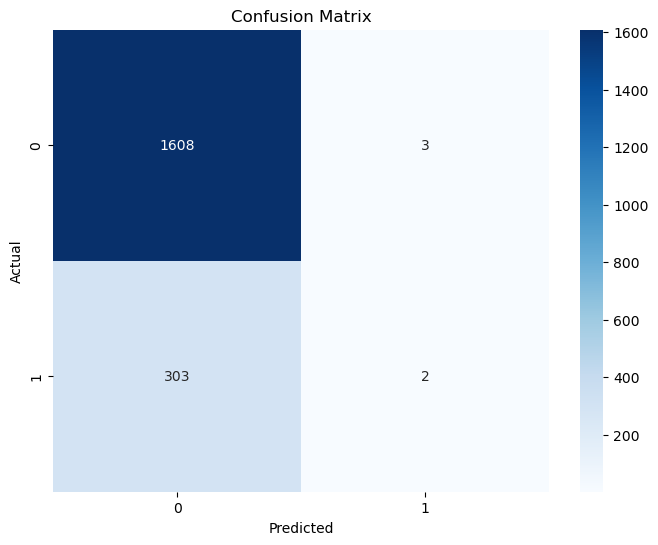

Voting ensemble Classifier Metrics:
AUC: 0.5023475898281283
Accuracy: 0.8402922755741128
Precision: 0.7711726090789616
Recall: 0.8402922755741128
Specificity: 0.16440290408214395
F1 Score: 0.7698162065990137
Classifier Report:
               precision    recall  f1-score   support

           0       0.84      1.00      0.91      1611
           1       0.40      0.01      0.01       305

    accuracy                           0.84      1916
   macro avg       0.62      0.50      0.46      1916
weighted avg       0.77      0.84      0.77      1916

----------------------------------
1608 3 303 2
pod:  0.006557377049180328
pof:  0.00186219739292365
AUC:  0.5023475898281283
accuracy:  0.8402922755741128
precision:  0.4
recall:  0.006557377049180328
specificity:  0.9981378026070763
F1:  0.012903225806451613


In [53]:
from sklearn.ensemble import VotingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.metrics import roc_auc_score
from imblearn.metrics import specificity_score
import matplotlib.pyplot as plt
import seaborn as sns

# Create individual classifiers
nb_clf = GaussianNB()
decision_tree = DecisionTreeClassifier(random_state=42)
random_forest = RandomForestClassifier(random_state=42)
xgb_classifier = XGBClassifier(random_state=42)
logistic_reg = LogisticRegression(random_state=42)
svm_classifier = SVC(random_state=42)
knn_classifier = KNeighborsClassifier(n_neighbors=5)

# Create an ensemble of classifiers using VotingClassifier
ensemble_classifier = VotingClassifier(estimators=[
    ('decision_tree', decision_tree),
    ('random_forest', random_forest),
    ('xgb_classifier', xgb_classifier), 
    ('logistic_reg', logistic_reg)
], voting='hard')  # 'hard' for majority vote

# Train the ensemble model
ensemble_classifier.fit(x_train, y_train)

# Predict on the test set
y_pred = ensemble_classifier.predict(x_test)

# Calculate AUC
auc = roc_auc_score(y_test, y_pred)
# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
# Calculate precision, recall, specificity, and F1 score
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
specificity=specificity_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')


# Generate a classification report
classification_rep = classification_report(y_test, y_pred)

# Generate a confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Print evaluation metrics separately
print("Voting ensemble Classifier Metrics:")
print("AUC:", auc) 
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("Specificity:", specificity)
print("F1 Score:", f1) 


# Print the classification report
print("Classifier Report:\n", classification_rep)


print('----------------------------------')
tn, fp, fn, tp  = confusion_matrix(y_test, y_pred).ravel()
print(tn, fp, fn, tp)

pod=tp/(tp+fn)
print('pod: ',pod)

pof=fp/(fp+tn)
print ('pof: ',pof)

auc_val=(1+pod-pof)/2
print ('AUC: ',auc_val)

accuracy_val=(tp+tn)/(tp+fn+fp+tn)
print ('accuracy: ',accuracy_val)

precision_val=tp/(tp+fp)  
print ('precision: ',precision_val)
 
recall_val = tp / (tp + fn)
print ('recall: ',recall_val)

specificity_val=tn/(fp+tn)
print ('specificity: ',specificity_val)

F1_val=(2*precision_val*recall_val)/(precision_val+recall_val)
print ('F1: ',F1_val)

List = ['Bank_loan_9578', 'RAW', 'Voting', round(auc,3), round(accuracy,3), round(specificity_val,3), round(precision,3), round(recall,3),round(f1,3)]
with open('RESULT_FROM_PGROGRAM_Bank_loan_9578.csv', 'a') as f_object:
 
    # Pass this file object to csv.writer()
    # and get a writer object
    writer_object = writer(f_object)
 
    # Pass the list as an argument into
    # the writerow()
    writer_object.writerow(List)
 
    # Close the file object
    f_object.close()

In [54]:
from sklearn.ensemble import VotingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.metrics import roc_auc_score
from imblearn.metrics import specificity_score
import matplotlib.pyplot as plt
import seaborn as sns

# Create individual classifiers
nb_clf = GaussianNB()
decision_tree = DecisionTreeClassifier(random_state=42)
random_forest = RandomForestClassifier(random_state=42)
xgb_classifier = XGBClassifier(random_state=42)
logistic_reg = LogisticRegression(random_state=42)
svm_classifier = SVC(random_state=42)
knn_classifier = KNeighborsClassifier(n_neighbors=5)


nb_clf.fit(x_train, y_train)
decision_tree.fit(x_train, y_train)
random_forest.fit(x_train, y_train)
logistic_reg.fit(x_train, y_train)
svm_classifier.fit(x_train, y_train)
knn_classifier.fit(x_train, y_train)

# Make predictions
nb_predictions = nb_clf.predict(x_test)
dt_predictions = decision_tree.predict(x_test)
rf_predictions = random_forest.predict(x_test)
lr_predictions=logistic_reg.predict(x_test)
svm_predictions=svm_classifier.predict(x_test)
knn_predictions=knn_classifier.predict(x_test)
# Define weights for classifiers
nb_weight = 0.2
dt_weight = 0.0
rf_weight = 0.0
lr_weight = 0.3
svm_weight = 0.4
knn_weight = 0.1

# Ensemble prediction with weighted average
ensemble_predictions = (lr_weight * lr_predictions) + (nb_weight * nb_predictions)+(svm_weight*svm_predictions)+(knn_weight*knn_predictions)
ensemble_predictions = [1 if pred >= 0.5 else 0 for pred in ensemble_predictions]

# Evaluate accuracy
ensemble_accuracy = accuracy_score(y_test, ensemble_predictions)
print(ensemble_accuracy)

0.8408141962421712
